In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fetal-health-classification/fetal_health.csv


In [2]:
df = pd.read_csv("/kaggle/input/fetal-health-classification/fetal_health.csv")

In [3]:
# columns present in our dataset
col =df.columns
col

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [4]:
# information about every feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
# discription of every numerical feature
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
# lets check any missing value in dataset
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

## visulization of data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


Histograms of Numerical Features:


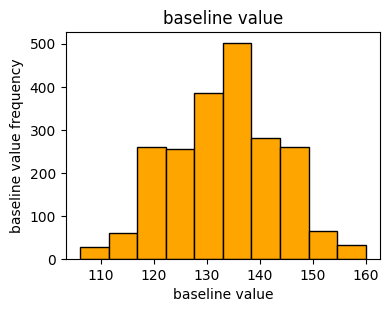

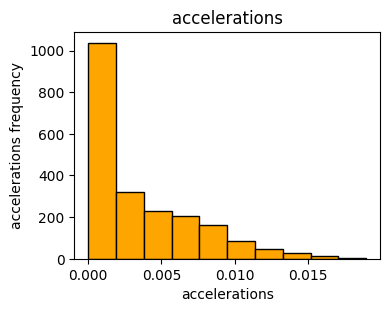

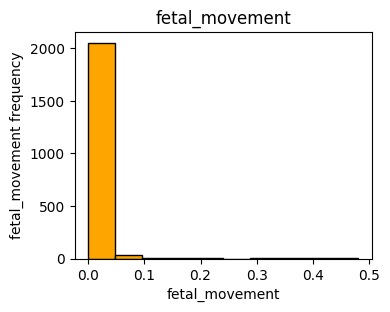

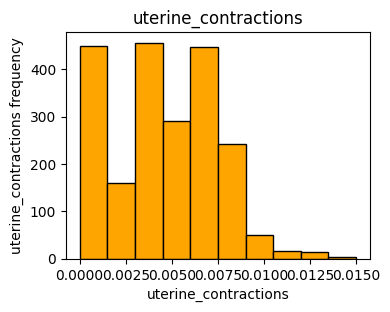

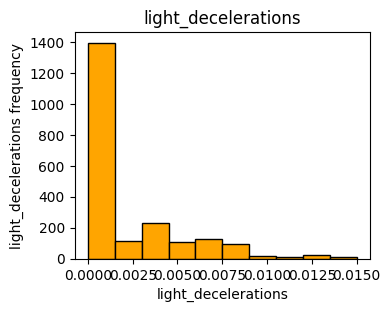

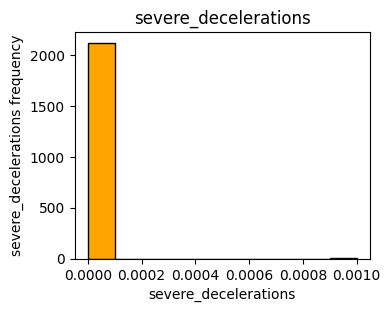

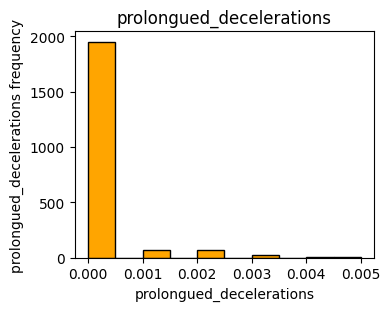

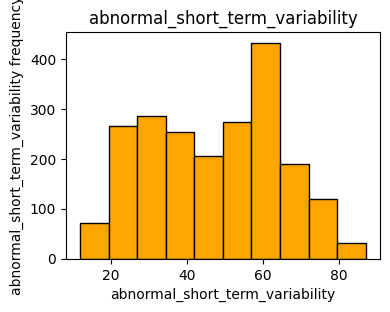

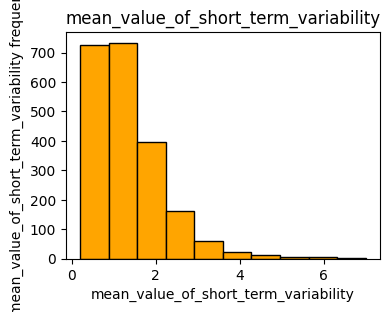

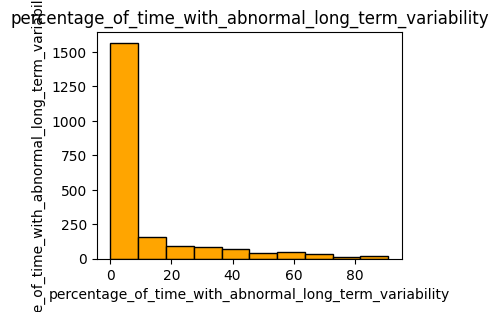

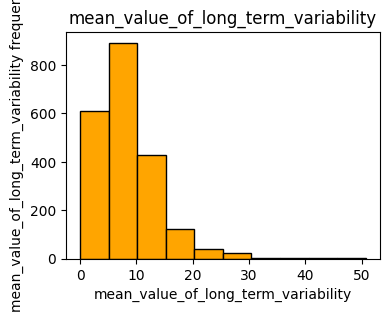

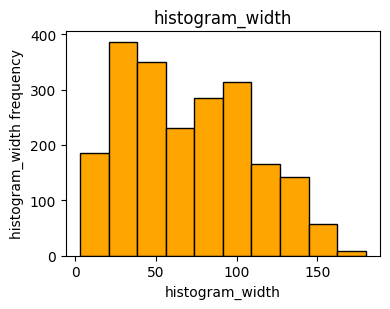

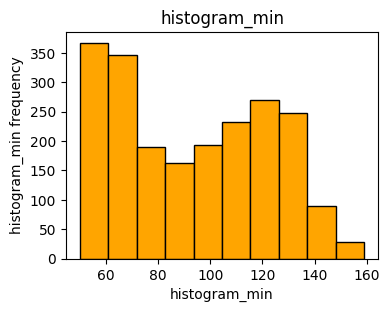

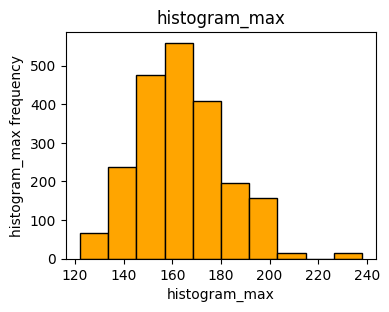

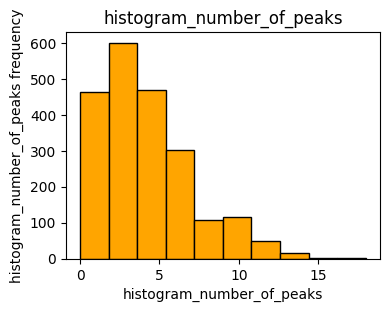

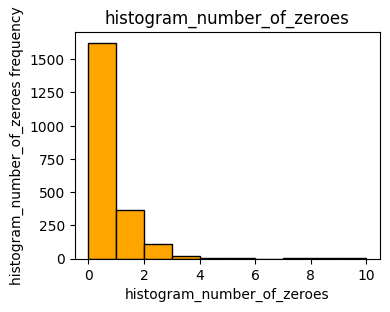

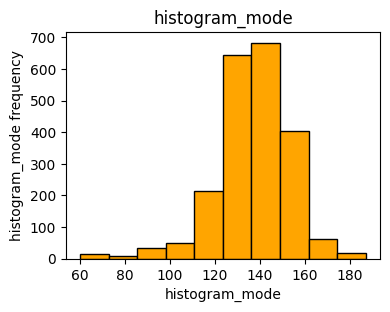

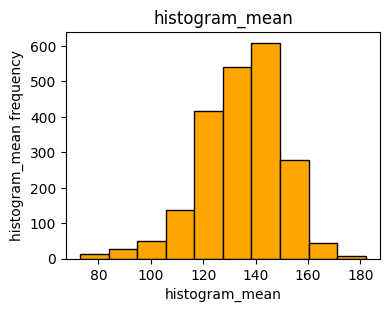

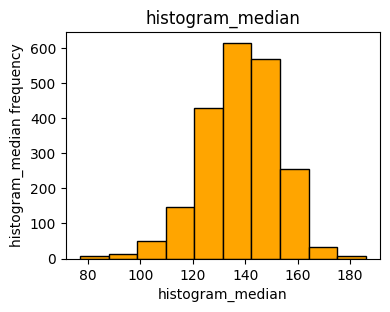

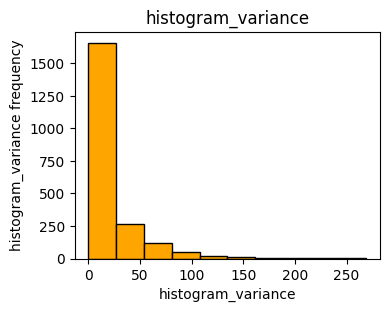

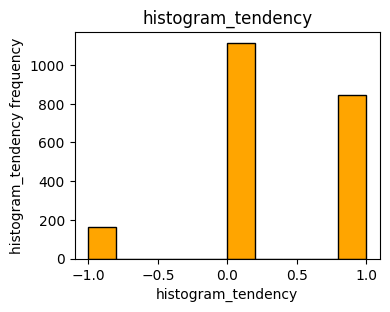

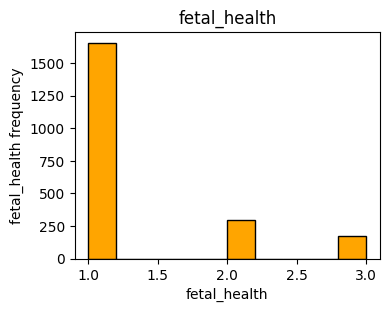

In [8]:

print("\nHistograms of Numerical Features:")
for i in col:
    plt.figure(figsize=(4,3)) 
    plt.hist(df[i],edgecolor = "black",color = "orange")
    plt.xlabel(i)
    plt.ylabel(i+" frequency")
    plt.tight_layout()
    plt.title(i)
    plt.show()


Histograms of Numerical Features:


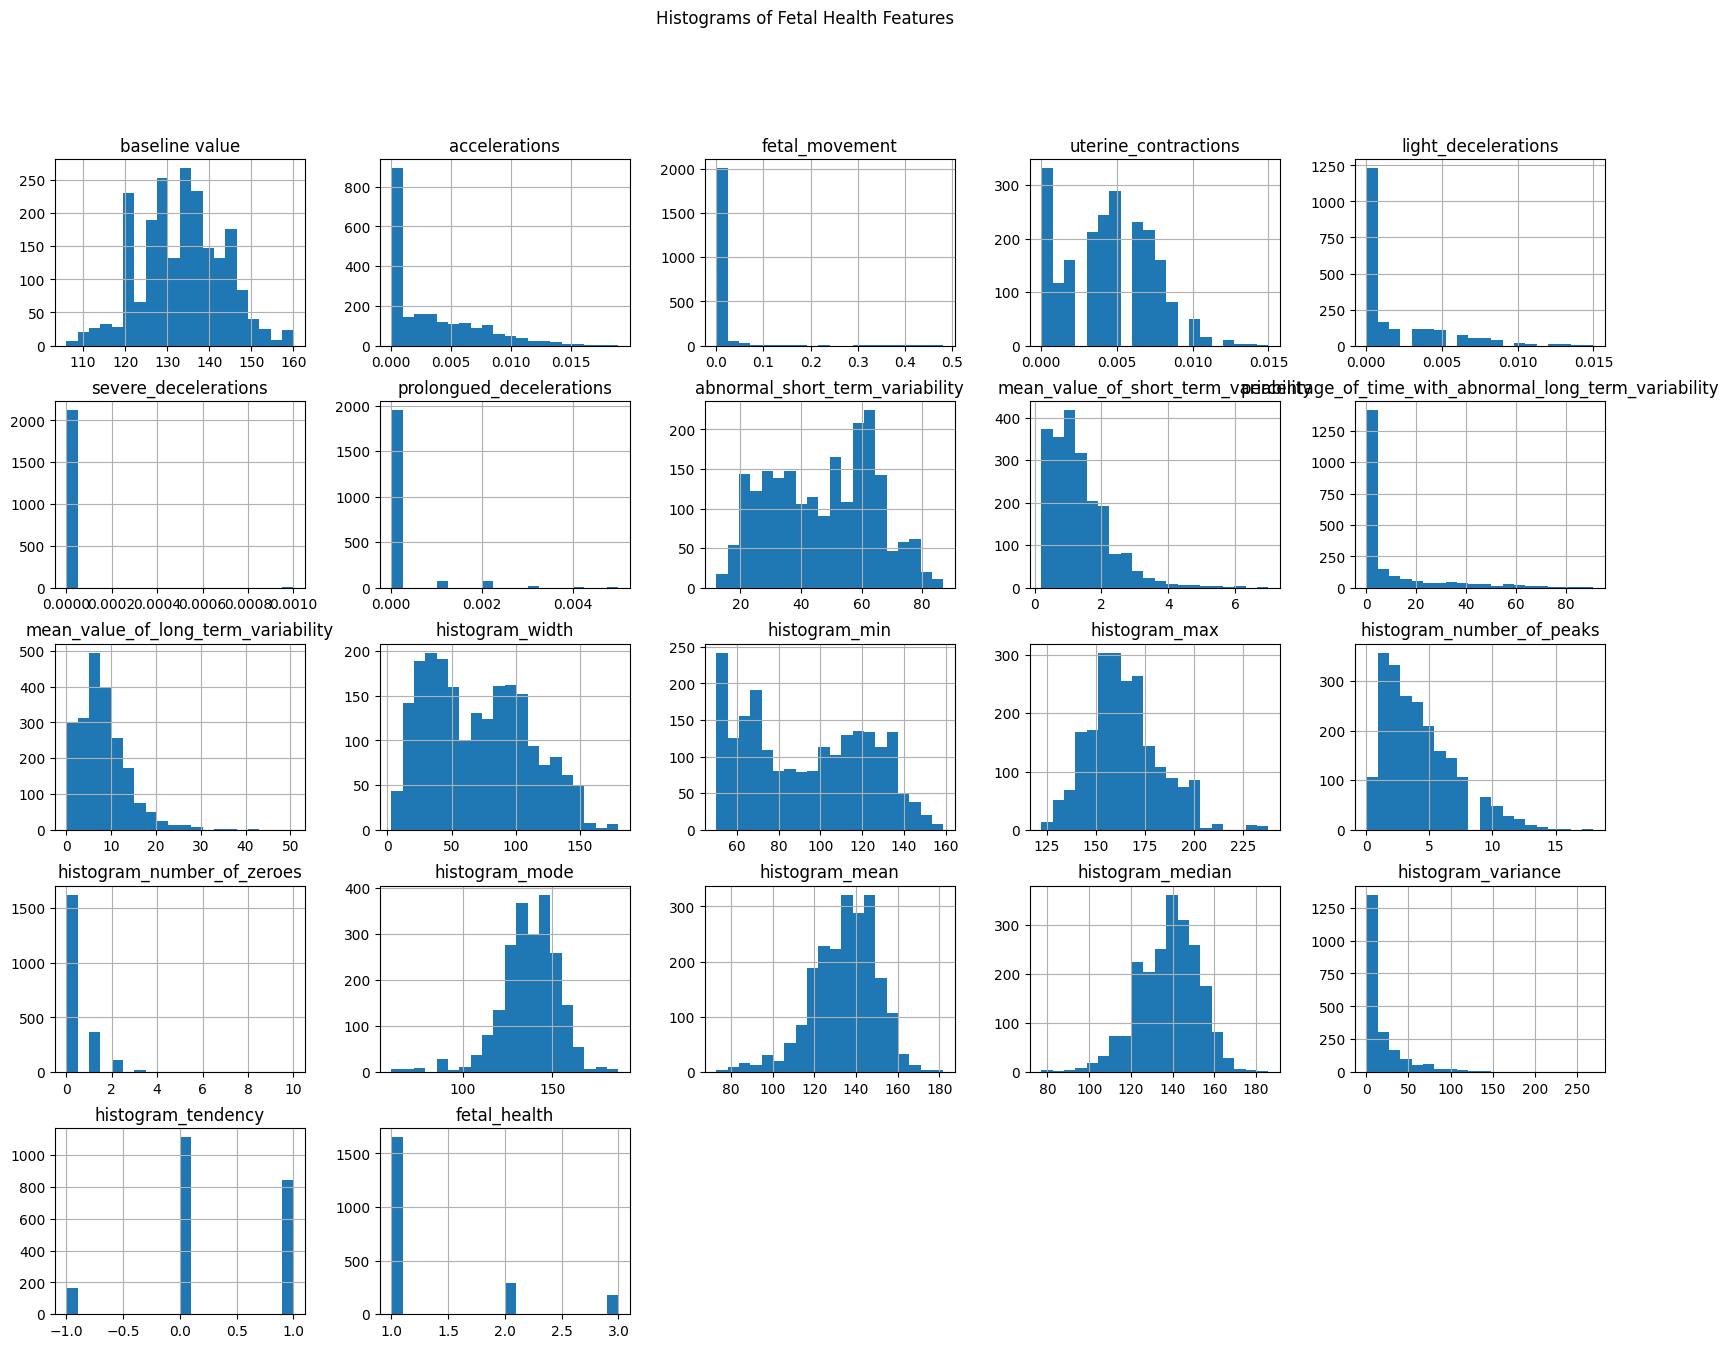

In [9]:
print("\nHistograms of Numerical Features:")
df.hist(bins=20, figsize=(20, 15))
plt.suptitle("Histograms of Fetal Health Features")

plt.show()

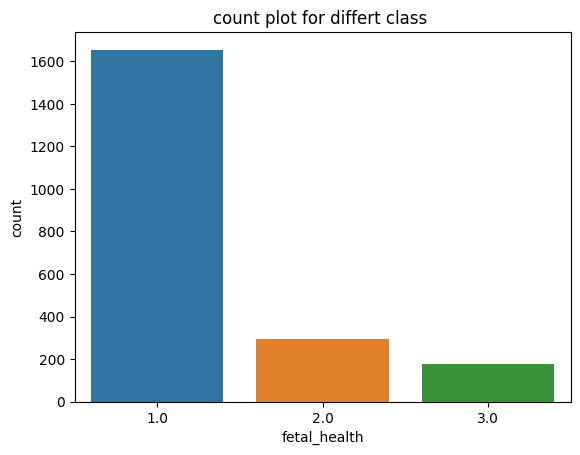

In [10]:
#  count distribution of fetal_health
sns.countplot(x="fetal_health" ,data = df)
plt.title("count plot for differt class ")
plt.show()

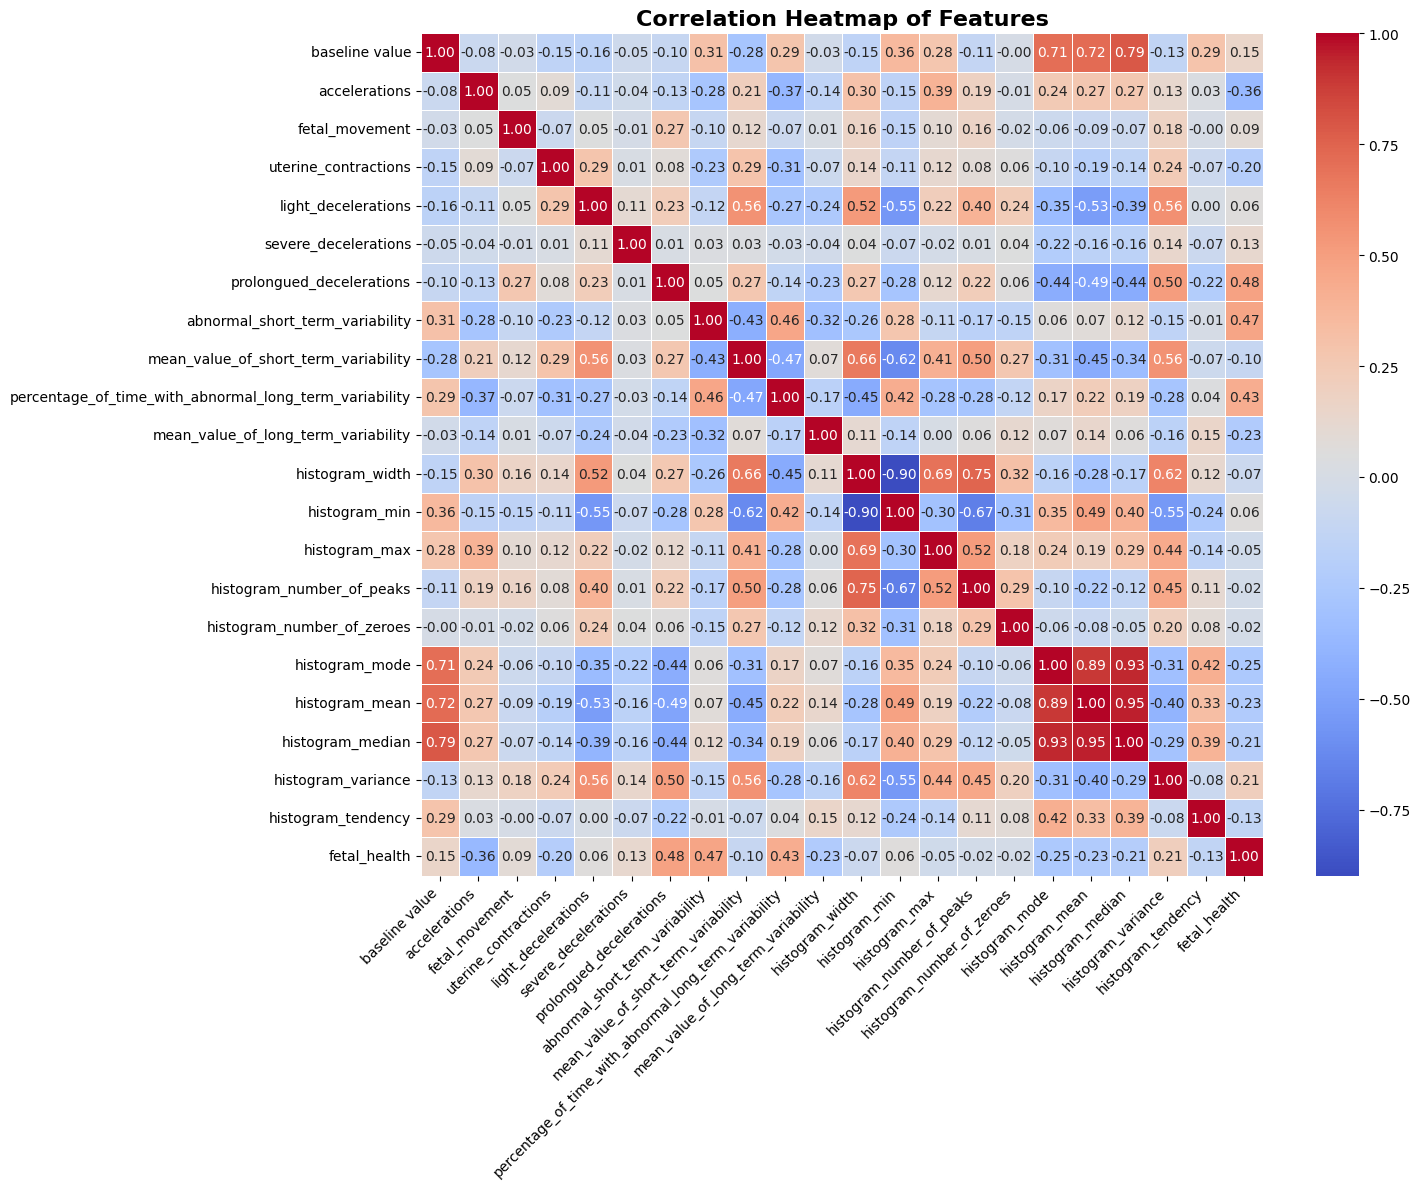

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


In [11]:
# heat map for describing the corelation of feature

plt.figure(figsize=(15,12))  # adjust size
sns.heatmap(
    df.corr(), 
    annot=True,         
    fmt=".2f",          
    cmap="coolwarm",    
    linewidths=0.5,
    cbar=True,
    square=True
)

plt.title("Correlation Heatmap of Features", fontsize=16, weight="bold")
plt.xticks(rotation=45, ha="right")  
plt.yticks(rotation=0)               
plt.tight_layout()
plt.show()
df.corr()

## modeling


In [12]:
# calling model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
# traintestsplit
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns="fetal_health"),df["fetal_health"],test_size=0.2,random_state = 1)
# fit our model
forest.fit(xtrain,ytrain)

RandomForestClassifier()

In [13]:
# feature importance
print("importance of feature as array \n",forest.feature_importances_)
feature_importance = pd.Series(forest.feature_importances_, index=df.drop(columns="fetal_health").columns).sort_values(ascending=False)
print("\n\nimportace of features as \n",feature_importance)

importance of feature as array 
 [0.0334956  0.04167453 0.01835882 0.04223202 0.00778276 0.0001544
 0.048449   0.13627293 0.13033547 0.10795503 0.04180802 0.04742532
 0.03377729 0.02993646 0.02215434 0.00429565 0.05430514 0.10924302
 0.05085755 0.03287355 0.0066131 ]


importace of features as 
 abnormal_short_term_variability                           0.136273
mean_value_of_short_term_variability                      0.130335
histogram_mean                                            0.109243
percentage_of_time_with_abnormal_long_term_variability    0.107955
histogram_mode                                            0.054305
histogram_median                                          0.050858
prolongued_decelerations                                  0.048449
histogram_width                                           0.047425
uterine_contractions                                      0.042232
mean_value_of_long_term_variability                       0.041808
accelerations                    

In [14]:
# accuracy of model without tunning
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report
print("accuracy of random forest ",accuracy_score(ytest,forest.predict(xtest)))
print("confusion matrix :\n",confusion_matrix(ytest,forest.predict(xtest)))
report_forest = pd.DataFrame(classification_report(ytest,forest.predict(xtest),output_dict=True))
report_forest

accuracy of random forest  0.9295774647887324
confusion matrix :
 [[324   2   0]
 [ 20  45   3]
 [  1   4  27]]


,1.0,2.0,3.0,accuracy,macro avg,weighted avg
precision,0.939130,0.882353,0.900000,0.929577,0.907161,0.927128
recall,0.993865,0.661765,0.843750,0.929577,0.833127,0.929577
f1-score,0.965723,0.756303,0.870968,0.929577,0.864331,0.925176
support,326.000000,68.000000,32.000000,0.929577,426.000000,426.000000


In [15]:
# lets find out how fit other model without tunning
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# voting = VotingClassifier(estimators = [("lg",LogisticRegression(max_iter=10000)),("dt",DecisionTreeClassifier())],voting='hard')
adaboost = AdaBoostClassifier()
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
tree = DecisionTreeClassifier()
# logr = LogisticRegression(max_iter = 10000)



In [16]:
# training
# voting.fit(xtrain,ytrain)
adaboost.fit(xtrain,ytrain)
forest.fit(xtrain,ytrain)
tree.fit(xtrain,ytrain)
# logr.fit(xtrain,ytrain)


DecisionTreeClassifier()

In [17]:
# accuracy for every model 
print(f"accuracy score for adaboost {accuracy_score(ytest,adaboost.predict(xtest))}")
print(f"accuracy score for random  foresst  {accuracy_score(ytest,forest.predict(xtest))}")
print(f"accuracy score for tree {accuracy_score(ytest,tree.predict(xtest))}")

accuracy score for adaboost 0.8802816901408451
accuracy score for random  foresst  0.9272300469483568
accuracy score for tree 0.9131455399061033


## usnig gridsearchcv for adaboost



In [18]:
from sklearn.model_selection import GridSearchCV
param_grid ={
    "n_estimators" : [100,500,1000],
    "learning_rate" : [0.1,0.001,0.01,0.0001]
}
gscv = GridSearchCV(
    estimator = AdaBoostClassifier(),
    param_grid = param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    
)
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.001, 0.01, 0.0001],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [19]:
# lets explore our tunned parameter
print("best parameters are ",gscv.best_params_)
print("best accuracy :",gscv.best_score_)


best parameters are  {'learning_rate': 0.1, 'n_estimators': 500}
best accuracy : 0.9011764705882352


# gridsearch for randomforest

In [20]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [21]:
# lets explore our tunned parameter
print("best parameters are ",grid.best_params_)
print("best accuracy :",grid.best_score_)

best parameters are  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
best accuracy : 0.9488235294117647


In [22]:
## fit again our model for best accuracy
# adaboost
adaboost_tun = AdaBoostClassifier(n_estimators=500,learning_rate = 0.1)
forest_tun = RandomForestClassifier(max_depth = 10,min_samples_split=5,n_estimators=200)



In [23]:
adaboost_tun.fit(xtrain,ytrain)
forest_tun.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200)

In [24]:
# accuracy for tunned model
print(f"accuracy score for adaboost {accuracy_score(ytest,adaboost.predict(xtest))}")
print(f"accuracy score for adaboost after tunning {accuracy_score(ytest,adaboost_tun.predict(xtest))}")
print(f"accuracy score for random  foresst  {accuracy_score(ytest,forest.predict(xtest))}")
print(f"accuracy score for random  foresst after tunning {accuracy_score(ytest,forest_tun.predict(xtest))}")

accuracy score for adaboost 0.8802816901408451
accuracy score for adaboost after tunning 0.9014084507042254
accuracy score for random  foresst  0.9272300469483568
accuracy score for random  foresst after tunning 0.9248826291079812


# Observation 
* It’s completely normal that CV accuracy (0.947) > test accuracy (0.929).
* This means your model might be slightly overfitting to CV folds, but it’s still generalizing decently.
* If your test set has a different class balance or slightly different feature distribution compared to training folds, accuracy can drop
* GridSearchCV selects hyperparameters that perform best on the training+validation folds.
But those hyperparameters may not generalize perfectly to new unseen data.This is a kind of data leakage to validation folds → slight overfitting.